# Detect anomalies in time series via IQR

### References

- [https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-](https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097)

## Programmatic preamble

In [1]:
from pathlib import Path
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

### Helper functions

In [2]:
def is_outlier_iqr(data_array, sensitivity_factor=1.5):
    """
    """
    q1 = data_array.quantile(q='.25', dim='time')
    q3 = data_array.quantile(q='.75', dim='time')
    IQR = q3 - q1
    lower_fence = q1 - sensitivity_factor*IQR
    upper_fence = q3 + sensitivity_factor*IQR
    # print(f'Fences : {lower_fence} - {upper_fence}')
    boolean_outliers = (data_array < lower_fence) | (data_array > upper_fence)
    return boolean_outliers

def get_outliers_iqr(data_array, sensitivity_factor=1.5):
    """
    """
    boolean_outliers = is_outlier_iqr(data_array, sensitivity_factor)
    outliers = data_array[boolean_outliers]
    return outliers

## Read data

In [3]:
path_to_data = Path('data')

t2m_some_location = xr.open_dataarray(path_to_data/'era5_and_land_2m_temperature_longitude_1643_latitude_4347.nc')
t2m_some_location_no_outliers = xr.open_dataarray(path_to_data/'era5_and_land_2m_temperature_longitude_2153_latitude_3947.nc')

d2m_location_3 = xr.open_dataarray(path_to_data/'dewpoint_temperature_location_3_pvgis52_patched.nc')
d2m_location_4 = xr.open_dataarray(path_to_data/'dewpoint_temperature_location_4_pvgis52_patched.nc')

rh_location_1 = xr.open_dataarray(path_to_data/'relative_humidity_location_1_pvgis52_patched.nc')
rh_location_5 = xr.open_dataarray(path_to_data/'relative_humidity_location_5_pvgis52_patched.nc')

ws_location_3 = xr.open_dataarray(path_to_data/'wind_speed_location_3_pvgis52_patched.nc')
ws_location_5 = xr.open_dataarray(path_to_data/'wind_speed_location_5_pvgis52_patched.nc')

# Anomalies in patched ERA5 & Land datasets

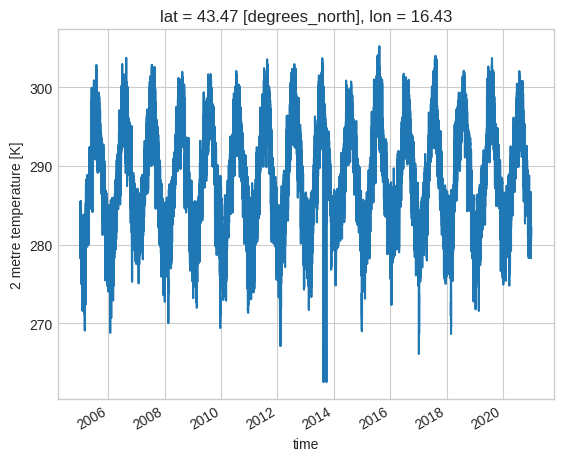

In [4]:
plt.style.use('seaborn-v0_8-whitegrid')
t2m_some_location.plot()

(array([1.0000e+01, 3.8800e+02, 1.7800e+03, 1.0366e+04, 2.6362e+04,
        3.2056e+04, 2.6267e+04, 2.5296e+04, 1.6578e+04, 1.1530e+03]),
 array([262.54458618, 266.81152344, 271.07843018, 275.34536743,
        279.61227417, 283.87921143, 288.14614868, 292.41305542,
        296.67999268, 300.94689941, 305.21383667]),
 <BarContainer object of 10 artists>)

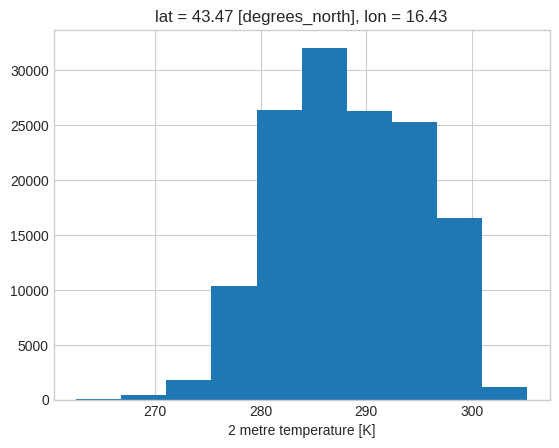

In [5]:
plt.style.use('seaborn-v0_8-whitegrid')
t2m_some_location.plot.hist()

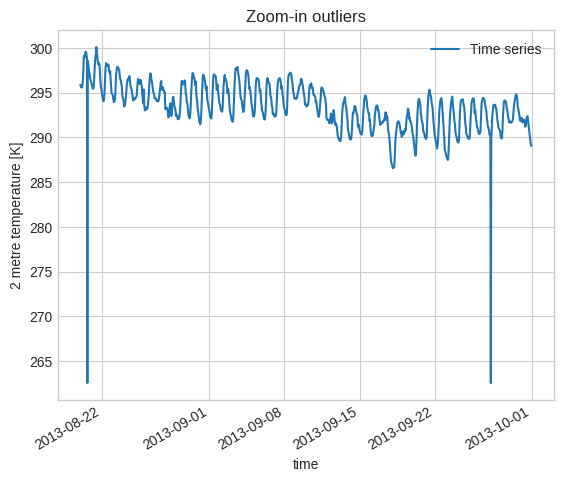

In [6]:
t2m_some_location.sel(time=slice('2013-08-20', '2013-09-30')).plot(label='Time series')
# t2m_some_location.sel(time=slice('2013-08-20', '2013-09-30')).where(t2m_some_location < 270).plot.line('r-v', ms=15, label='Outliers')
plt.title('Zoom-in outliers')
plt.legend()
plt.show()

## IQR

Detect outliers via the IQR method, using various sensitivity factors (i.e., 1.5, 2, 2.5)

### Temperature 2m

In [7]:
sensitivity_factor_1 = 1.5
sensitivity_factor_2 = 1.8
sensitivity_factor_3 = 2
t2m_some_location_outliers_1 = get_outliers_iqr(t2m_some_location, sensitivity_factor=sensitivity_factor_1)
t2m_some_location_outliers_2 = get_outliers_iqr(t2m_some_location, sensitivity_factor=sensitivity_factor_2)
t2m_some_location_outliers_3 = get_outliers_iqr(t2m_some_location, sensitivity_factor=sensitivity_factor_3)

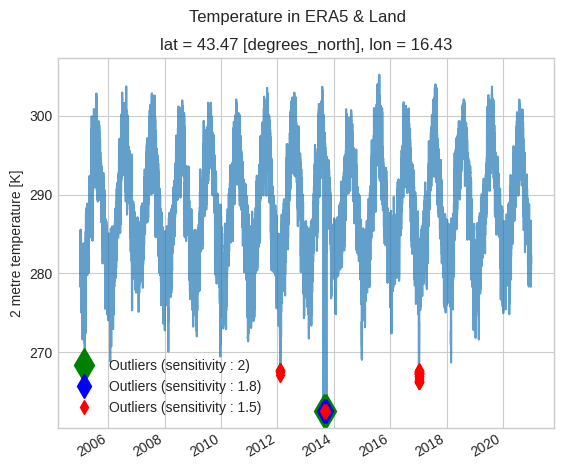

In [8]:
t2m_some_location.plot(alpha=0.7)
t2m_some_location_outliers_3.plot.line('gd', ms=17, label=f'Outliers (sensitivity : {sensitivity_factor_3})')
t2m_some_location_outliers_2.plot.line('bd', ms=12, label=f'Outliers (sensitivity : {sensitivity_factor_2})')
t2m_some_location_outliers_1.plot.line('rd', ms=7, label=f'Outliers (sensitivity : {sensitivity_factor_1})')
plt.suptitle('Temperature in ERA5 & Land')
# first_year = t2m_some_location.time[0].values.astype('datetime64[Y]').astype(int) + 1970
# last_year = t2m_some_location.time[-1].values.astype('datetime64[Y]').astype(int) + 1970
# first_year, last_year
# plt.title(f'{first_year} - {last_year}')
# t2m_some_location.lat.values
plt.xlabel('')
plt.legend()
plt.show()

In [9]:
sensitivity_factor_1 = 1.5
sensitivity_factor_2 = 1.8
sensitivity_factor_3 = 2
t2m_some_location_no_outliers_outliers_1 = get_outliers_iqr(t2m_some_location_no_outliers, sensitivity_factor=sensitivity_factor_1)
t2m_some_location_no_outliers_outliers_2 = get_outliers_iqr(t2m_some_location_no_outliers, sensitivity_factor=sensitivity_factor_2)
t2m_some_location_no_outliers_outliers_3 = get_outliers_iqr(t2m_some_location_no_outliers, sensitivity_factor=sensitivity_factor_3)

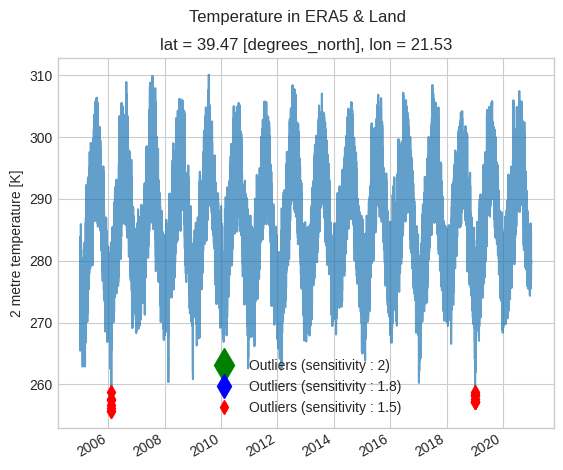

In [10]:
t2m_some_location_no_outliers.plot(alpha=0.7)
t2m_some_location_no_outliers_outliers_3.plot.line('gd', ms=17, label=f'Outliers (sensitivity : {sensitivity_factor_3})')
t2m_some_location_no_outliers_outliers_2.plot.line('bd', ms=12, label=f'Outliers (sensitivity : {sensitivity_factor_2})')
t2m_some_location_no_outliers_outliers_1.plot.line('rd', ms=7, label=f'Outliers (sensitivity : {sensitivity_factor_1})')
plt.suptitle('Temperature in ERA5 & Land')
# first_year = t2m_some_location_no_outliers.time[0].values.astype('datetime64[Y]').astype(int) + 1970
# last_year = t2m_some_location_no_outliers.time[-1].values.astype('datetime64[Y]').astype(int) + 1970
# first_year, last_year
# plt.title(f'{first_year} - {last_year}')
# t2m_some_location_no_outliers.lat.values
plt.xlabel('')
plt.legend()
plt.show()

### Dewpoint temperature 2m

(array([ 3934.,     0.,   199.,  2123.,  7592., 16059., 31241., 35391.,
        34480.,  9237.]),
 array([-26.5034 , -21.41478, -16.32616, -11.23754,  -6.14892,  -1.0603 ,
          4.02832,   9.11694,  14.20556,  19.29418,  24.3828 ]),
 <BarContainer object of 10 artists>)

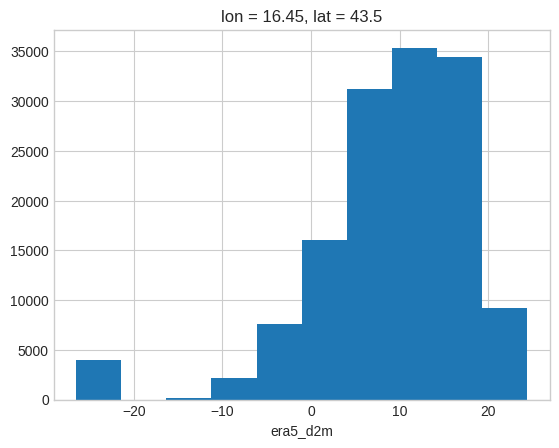

In [11]:
d2m_location_3.plot.hist()

In [12]:
sensitivity_factor_1 = 1.5
sensitivity_factor_2 = 1.8
sensitivity_factor_3 = 2
d2m_location_3_outliers_1 = get_outliers_iqr(d2m_location_3, sensitivity_factor=sensitivity_factor_1)
d2m_location_3_outliers_2 = get_outliers_iqr(d2m_location_3, sensitivity_factor=sensitivity_factor_2)
d2m_location_3_outliers_3 = get_outliers_iqr(d2m_location_3, sensitivity_factor=sensitivity_factor_3)

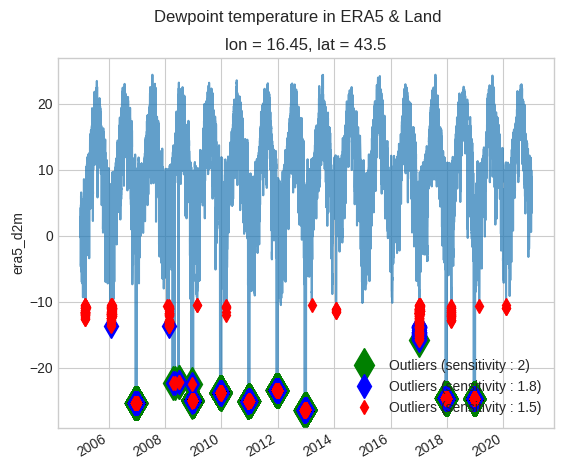

In [13]:
d2m_location_3.plot(alpha=0.7)
d2m_location_3_outliers_3.plot.line('gd', ms=17, label=f'Outliers (sensitivity : {sensitivity_factor_3})')
d2m_location_3_outliers_2.plot.line('bd', ms=12, label=f'Outliers (sensitivity : {sensitivity_factor_2})')
d2m_location_3_outliers_1.plot.line('rd', ms=7, label=f'Outliers (sensitivity : {sensitivity_factor_1})')
plt.suptitle('Dewpoint temperature in ERA5 & Land')
# first_year = t2m_some_location.time[0].values.astype('datetime64[Y]').astype(int) + 1970
# last_year = t2m_some_location.time[-1].values.astype('datetime64[Y]').astype(int) + 1970
# first_year, last_year
# plt.title(f'{first_year} - {last_year}')
# t2m_some_location.lat.values
plt.xlabel('')
plt.legend()
plt.show()

In [14]:
sensitivity_factor_1 = 1.5
sensitivity_factor_2 = 1.8
sensitivity_factor_4 = 2
d2m_location_4_outliers_1 = get_outliers_iqr(d2m_location_4, sensitivity_factor=sensitivity_factor_1)
d2m_location_4_outliers_2 = get_outliers_iqr(d2m_location_4, sensitivity_factor=sensitivity_factor_2)
d2m_location_4_outliers_4 = get_outliers_iqr(d2m_location_4, sensitivity_factor=sensitivity_factor_4)

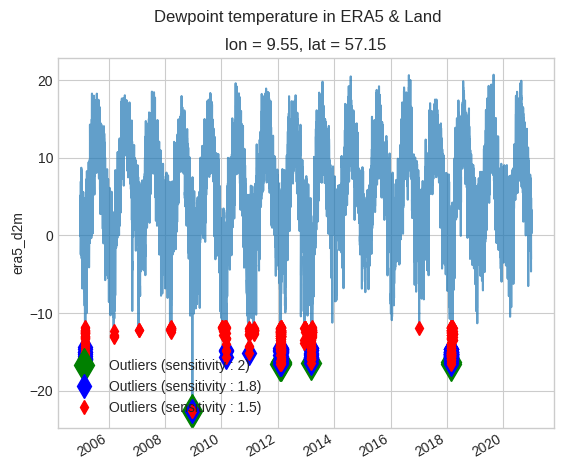

In [15]:
d2m_location_4.plot(alpha=0.7)
d2m_location_4_outliers_4.plot.line('gd', ms=17, label=f'Outliers (sensitivity : {sensitivity_factor_4})')
d2m_location_4_outliers_2.plot.line('bd', ms=12, label=f'Outliers (sensitivity : {sensitivity_factor_2})')
d2m_location_4_outliers_1.plot.line('rd', ms=7, label=f'Outliers (sensitivity : {sensitivity_factor_1})')
plt.suptitle('Dewpoint temperature in ERA5 & Land')
# first_year = t2m_some_location.time[0].values.astype('datetime64[Y]').astype(int) + 1970
# last_year = t2m_some_location.time[-1].values.astype('datetime64[Y]').astype(int) + 1970
# first_year, last_year
# plt.title(f'{first_year} - {last_year}')
# t2m_some_location.lat.values
plt.xlabel('')
plt.legend()
plt.show()

### Relative humidity

(array([1.0000e+00, 3.8000e+01, 8.2900e+02, 3.6700e+03, 8.5830e+03,
        1.2475e+04, 1.6476e+04, 2.1905e+04, 3.2858e+04, 4.3421e+04]),
 array([ 17.5 ,  25.75,  34.  ,  42.25,  50.5 ,  58.75,  67.  ,  75.25,
         83.5 ,  91.75, 100.  ]),
 <BarContainer object of 10 artists>)

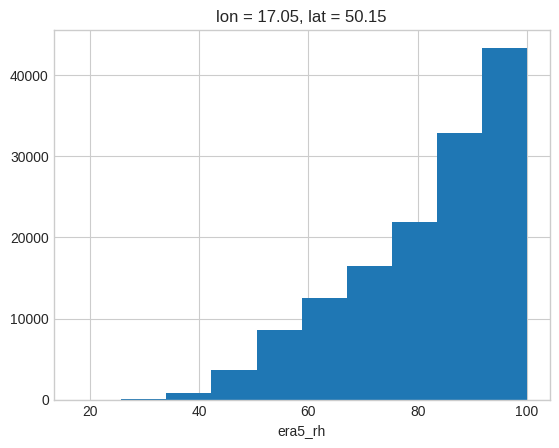

In [16]:
rh_location_1.plot.hist()

In [17]:
sensitivity_factor_1 = 1.5
sensitivity_factor_2 = 1.8
sensitivity_factor_3 = 2
rh_location_1_outliers_1 = get_outliers_iqr(rh_location_1, sensitivity_factor=sensitivity_factor_1)
rh_location_1_outliers_2 = get_outliers_iqr(rh_location_1, sensitivity_factor=sensitivity_factor_2)
rh_location_1_outliers_3 = get_outliers_iqr(rh_location_1, sensitivity_factor=sensitivity_factor_3)

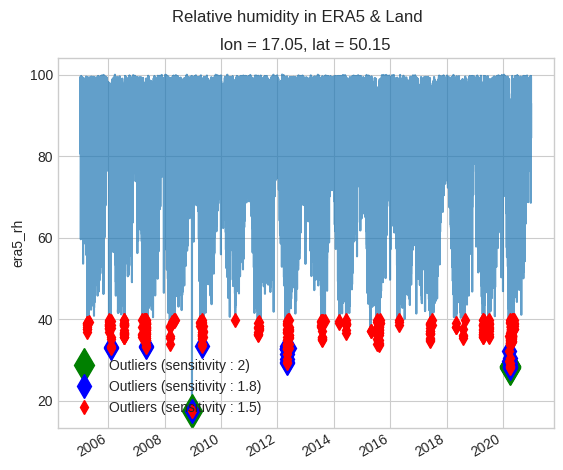

In [18]:
rh_location_1.plot(alpha=0.7)
rh_location_1_outliers_3.plot.line('gd', ms=17, label=f'Outliers (sensitivity : {sensitivity_factor_3})')
rh_location_1_outliers_2.plot.line('bd', ms=12, label=f'Outliers (sensitivity : {sensitivity_factor_2})')
rh_location_1_outliers_1.plot.line('rd', ms=7, label=f'Outliers (sensitivity : {sensitivity_factor_1})')
plt.suptitle('Relative humidity in ERA5 & Land')
# first_year = t2m_some_location.time[0].values.astype('datetime64[Y]').astype(int) + 1970
# last_year = t2m_some_location.time[-1].values.astype('datetime64[Y]').astype(int) + 1970
# first_year, last_year
# plt.title(f'{first_year} - {last_year}')
# t2m_some_location.lat.values
plt.xlabel('')
plt.legend()
plt.show()

In [19]:
sensitivity_factor_5 = 1.5
sensitivity_factor_2 = 1.8
sensitivity_factor_3 = 2
rh_location_5_outliers_5 = get_outliers_iqr(rh_location_5, sensitivity_factor=sensitivity_factor_5)
rh_location_5_outliers_2 = get_outliers_iqr(rh_location_5, sensitivity_factor=sensitivity_factor_2)
rh_location_5_outliers_3 = get_outliers_iqr(rh_location_5, sensitivity_factor=sensitivity_factor_3)

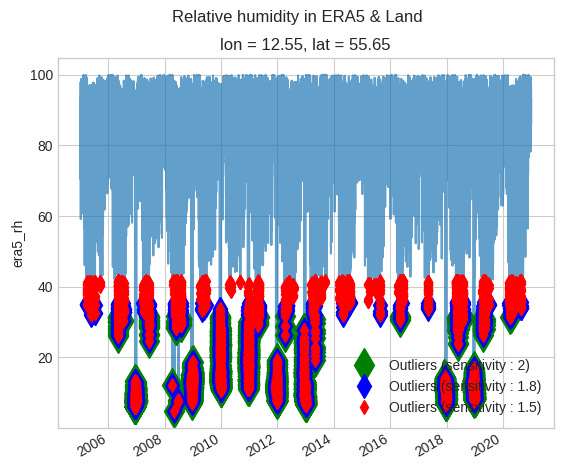

In [20]:
rh_location_5.plot(alpha=0.7)
rh_location_5_outliers_3.plot.line('gd', ms=17, label=f'Outliers (sensitivity : {sensitivity_factor_3})')
rh_location_5_outliers_2.plot.line('bd', ms=12, label=f'Outliers (sensitivity : {sensitivity_factor_2})')
rh_location_5_outliers_5.plot.line('rd', ms=7, label=f'Outliers (sensitivity : {sensitivity_factor_5})')
plt.suptitle('Relative humidity in ERA5 & Land')
# first_year = t2m_some_location.time[0].values.astype('datetime64[Y]').astype(int) + 1970
# last_year = t2m_some_location.time[-1].values.astype('datetime64[Y]').astype(int) + 1970
# first_year, last_year
# plt.title(f'{first_year} - {last_year}')
# t2m_some_location.lat.values
plt.xlabel('')
plt.legend()
plt.show()

### Wind speed 2m

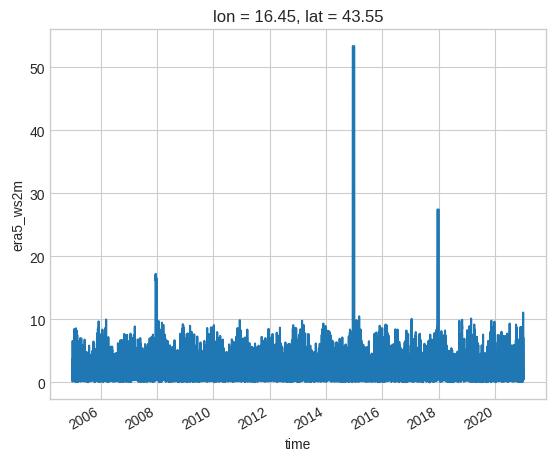

In [21]:
ws_location_3.plot()

(array([1.30233e+05, 8.56600e+03, 2.00000e+00, 4.85000e+02, 0.00000e+00,
        4.85000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.85000e+02]),
 array([ 0.   ,  5.335, 10.67 , 16.005, 21.34 , 26.675, 32.01 , 37.345,
        42.68 , 48.015, 53.35 ]),
 <BarContainer object of 10 artists>)

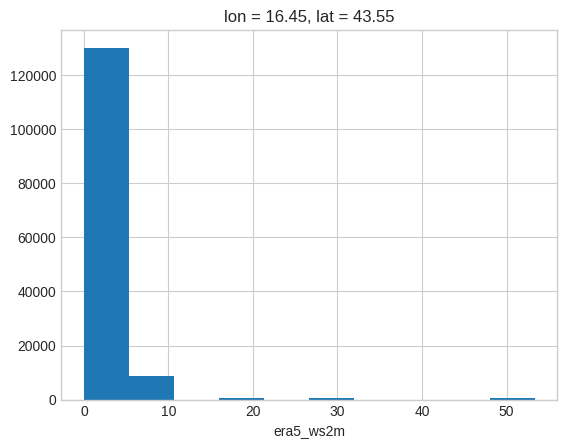

In [22]:
ws_location_3.plot.hist()

In [23]:
sensitivity_factor_1 = 1.5
sensitivity_factor_2 = 1.8
sensitivity_factor_3 = 5
ws_location_3_outliers_1 = get_outliers_iqr(ws_location_3, sensitivity_factor=sensitivity_factor_1)
ws_location_3_outliers_2 = get_outliers_iqr(ws_location_3, sensitivity_factor=sensitivity_factor_2)
ws_location_3_outliers_3 = get_outliers_iqr(ws_location_3, sensitivity_factor=sensitivity_factor_3)

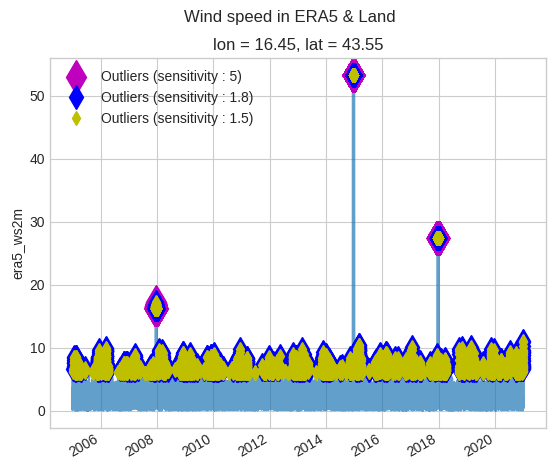

In [24]:
ws_location_3.plot(alpha=0.7)
ws_location_3_outliers_3.plot.line('md', ms=17, label=f'Outliers (sensitivity : {sensitivity_factor_3})')
ws_location_3_outliers_2.plot.line('bd', ms=12, label=f'Outliers (sensitivity : {sensitivity_factor_2})')
ws_location_3_outliers_1.plot.line('yd', ms=7, label=f'Outliers (sensitivity : {sensitivity_factor_1})')
plt.suptitle('Wind speed in ERA5 & Land')
# first_year = t2m_some_location.time[0].values.astype('datetime64[Y]').astype(int) + 1970
# last_year = t2m_some_location.time[-1].values.astype('datetime64[Y]').astype(int) + 1970
# first_year, last_year
# plt.title(f'{first_year} - {last_year}')
# t2m_some_location.lat.values
plt.xlabel('')
plt.legend()
plt.show()

In [25]:
sensitivity_factor_1 = 1.5
sensitivity_factor_2 = 1.8
sensitivity_factor_5 = 5
ws_location_5_outliers_1 = get_outliers_iqr(ws_location_5, sensitivity_factor=sensitivity_factor_1)
ws_location_5_outliers_2 = get_outliers_iqr(ws_location_5, sensitivity_factor=sensitivity_factor_2)
ws_location_5_outliers_5 = get_outliers_iqr(ws_location_5, sensitivity_factor=sensitivity_factor_5)

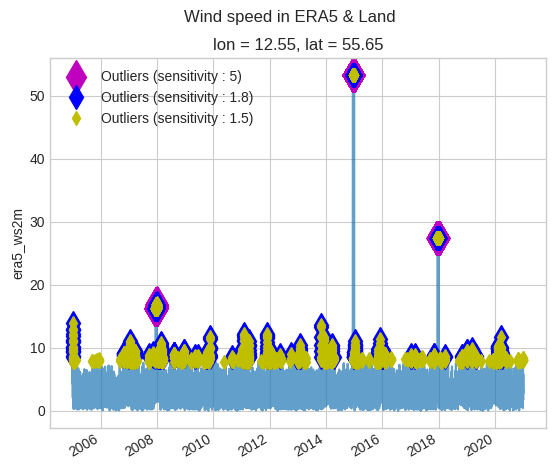

In [26]:
ws_location_5.plot(alpha=0.7)
ws_location_5_outliers_5.plot.line('md', ms=17, label=f'Outliers (sensitivity : {sensitivity_factor_5})')
ws_location_5_outliers_2.plot.line('bd', ms=12, label=f'Outliers (sensitivity : {sensitivity_factor_2})')
ws_location_5_outliers_1.plot.line('yd', ms=7, label=f'Outliers (sensitivity : {sensitivity_factor_1})')
plt.suptitle('Wind speed in ERA5 & Land')
# first_year = t2m_some_location.time[0].values.astype('datetime64[Y]').astype(int) + 1970
# last_year = t2m_some_location.time[-1].values.astype('datetime64[Y]').astype(int) + 1970
# first_year, last_year
# plt.title(f'{first_year} - {last_year}')
# t2m_some_location.lat.values
plt.xlabel('')
plt.legend()
plt.show()

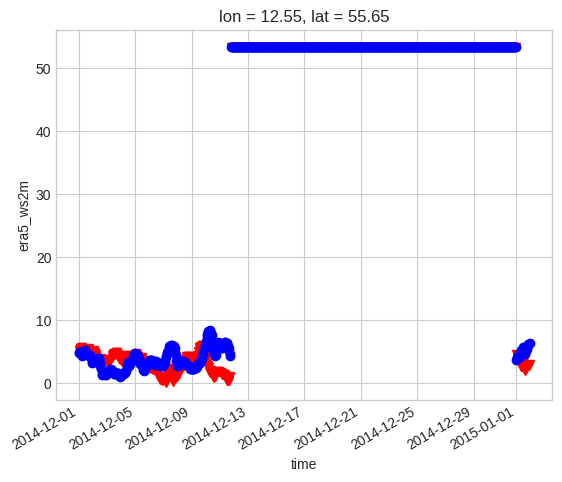

In [27]:
ws_location_3.sel(time=slice('2014-12-01', '2015-01-01')).plot.line('rv')
ws_location_5.sel(time=slice('2014-12-01', '2015-01-01')).plot.line('bo')
# (ws_location_3 - ws_location_5).plot()